<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_Python/blob/main/Colab_Notebook/02_07_05_04_survival_analysis_aalen_model_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 5.4 Aalen's Additive Regression Model

Recently, Aalen's additive regression model has gained popularity as an alternative to the Cox proportional hazards model. Unlike the Cox model, which assumes that covariates have a multiplicative effect on the hazard function, the Aalen model assumes an additive effect. This means that the hazard function is expressed as a sum of baseline hazard and covariate effects. This flexibility allows the Aalen model to capture more complex relationships between covariates and survival times, making it particularly useful in scenarios where the proportional hazards assumption may not hold. This section will explore the implementation of Aalen's additive regression model using Python, providing insights into its application and interpretation in survival analysis.


## Overview


The **Aalen's Additive regression model**, also known as the **Aalen’s additive hazards model**, is a statistical technique used in survival analysis. Unlike the more commonly used Cox Proportional Hazards model, which assumes a multiplicative relationship between the covariates and the hazard function, the Aalen model assumes an **additive** relationship between the covariates and the hazard function. This model is particularly useful when the proportional hazards assumption of the Cox model does not hold, meaning that the effects of covariates on survival are not constant over time.

***Key Concepts of the Aalen Model***:

1.  **Additive Hazards**:
    -   In the Aalen model, the hazard at time $t$ is expressed as the sum of contributions from the covariates. The contribution of each covariate to the hazard function can change over time, making the model more flexible than the Cox model.
    -   The hazard function $h(t)$is expressed as an additive function of the covariates.
2.  **Time-Varying Coefficients**:
    -   The Aalen model allows for **time-varying effects** of the covariates, meaning that the effect of each covariate on the hazard can change over time. This is an important feature that differentiates it from other survival models like the Cox model, which assumes constant covariate effects.
3.  **No Proportional Hazards Assumption**:
    -   The model does not rely on the proportional hazards assumption, making it more appropriate for situations where the covariates' effects vary over time.
4.  **Interpretation**:
    -   The coefficients in the Aalen model represent the **incremental effects** of the covariates on the hazard function at each time point. These coefficients are not hazard ratios, as in the Cox model, but are rather additive effects.



The Aalen additive hazards model can be written as:

$$ h(t|X) = h_0(t) + \beta_1(t) X_1 + \beta_2(t) X_2 + \dots + \beta_p(t) X_p $$

Where:

-   $h(t|X)$ is the hazard at time $t$ for an individual with covariates $X_1, X_2, \dots, X_p$.
-   $h_0(t)$ is the baseline hazard function at time $t$.
-   $\beta_1(t), \beta_2(t), \dots, \beta_p(t)$ are the **time-varying** coefficients for each covariate $X_1, X_2, \dots, X_p$, indicating how the effect of each covariate on the hazard changes over time.

***Key Differences Between the Aalen Model and Cox Model***:

1.  **Additive vs. Multiplicative**:
    -   **Aalen model**: Assumes an **additive** effect of covariates on the hazard function.
    -   **Cox model**: Assumes a **multiplicative** effect of covariates on the hazard function.
2.  **Time-Varying Coefficients**:
    -   **Aalen model**: Allows for time-varying effects of covariates (i.e., the effect of a covariate can change over time).
    -   **Cox model**: Assumes the effects of covariates (hazard ratios) are **constant over time**.
3.  **Proportional Hazards Assumption**:
    -   **Aalen model**: Does **not** require the proportional hazards assumption.
    -   **Cox model**: Requires the proportional hazards assumption (the effect of covariates on the hazard is proportional over time).
4.  **Interpretation**:
    -   **Aalen model**: Coefficients represent **additive** contributions to the hazard rate, which vary over time.
    -   **Cox model**: Coefficients represent **multiplicative** hazard ratios, which are assumed to be constant over time.

***Applications of the Aalen Model***:

1.  **Time-Varying Effects**:
    -   The Aalen model is particularly useful when the effects of covariates are expected to change over time. For example, in medical research, the effect of a treatment may change as patients progress through different stages of their disease.
2.  **Exploratory Analysis**:
    -   It is often used for exploratory analysis to check whether the proportional hazards assumption holds. If the covariate effects appear to be time-varying in the Aalen model, it suggests that the Cox model may not be appropriate.
3.  **Flexible Survival Modeling**:
    -   The model provides more flexibility than the Cox model, especially when the effects of covariates are not constant over time.

***Advantages of the Aalen Model***:

1.  **Flexibility**:
    -   The model allows for **time-varying covariate effects**, making it useful when the proportional hazards assumption does not hold.
2.  **Exploratory Tool**:
    -   It can be used to explore time-varying effects of covariates and identify whether a simpler Cox model is appropriate.
3.  **No Proportional Hazards Assumption**:
    -   It does not require the proportional hazards assumption, making it more robust in certain settings.

***Limitations***:

1.  **Interpretability**:
    -   The coefficients are harder to interpret compared to hazard ratios in the Cox model, especially because they are time-varying and represent additive effects.
2.  **Less Popular**:
    -   The Aalen model is less commonly used than the Cox model, which means there is less software support and fewer resources available for interpreting results.
3.  **Less Efficient**:
    -   If the true underlying model is multiplicative (as assumed by the Cox model), the Aalen model may be less efficient in estimating the effects of covariates.



## Cheeck and Load Required Packages

In [1]:
import subprocess
import sys

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'scikit-survival', 'lifelines', 'statsmodels']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("Installed packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")

pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
Installing scikit-survival...
Failed to install scikit-survival: No module named 'scikit-survival'
Error with package scikit-survival: No module named 'scikit-survival'
Installing lifelines...
lifelines installed successfully
statsmodels is already installed
Installed packages:
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✗ scikit-learn
✗ scikit-survival
✓ lifelines
✓ statsmodels


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import AalenAdditiveFitter, KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Aalen Model in  Python

### Data

In this example we use use veteran data set. The data set contains following variables:

* `trt`:	1=standard 2=test

* `celltype`:	1=squamous, 2=smallcell, 3=adeno, 4=large

* `time`:	survival time

* `status`:	censoring status

* `karno`:	Karnofsky performance score (100=good)

* `diagtime`:	months from diagnosis to randomisation

* `age`:	in years

* `prior`:	prior therapy 0=no, 10=yes


In [3]:
# Load the Veteran dataset
url = "https://raw.githubusercontent.com/zia207/Survival_Analysis_Python/main/Data/veteran_data.csv"
veteran = pd.read_csv(url)

# Display basic information
print("Veteran Dataset Analysis")
print("="*60)
print("Dataset shape:", veteran.shape)
print("\nFirst few rows:")
print(veteran.head())
print("\nColumn information:")
print(veteran.info())
print("\nBasic statistics:")
print(veteran.describe())

# Check for missing values
print(f"\nMissing values:\n{veteran.isnull().sum()}")

Veteran Dataset Analysis
Dataset shape: (137, 8)

First few rows:
   trt  celltype  time  status  karno  diagtime  age  prior
0    1  squamous    72       1     60         7   69      0
1    1  squamous   411       1     70         5   64     10
2    1  squamous   228       1     60         3   38      0
3    1  squamous   126       1     60         9   63     10
4    1  squamous   118       1     70        11   65     10

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   trt       137 non-null    int64 
 1   celltype  137 non-null    object
 2   time      137 non-null    int64 
 3   status    137 non-null    int64 
 4   karno     137 non-null    int64 
 5   diagtime  137 non-null    int64 
 6   age       137 non-null    int64 
 7   prior     137 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.7+ KB
None

Basic statist

### Data Processing

In [4]:
# Create a copy for manipulation
df = veteran.copy()

# Convert variables to meaningful categorical types
# Treatment (1=standard, 2=test)
df['treatment'] = pd.Categorical(df['trt'].map({1: 'Standard', 2: 'Test'}))

# Cell type (already as strings)
df['celltype'] = pd.Categorical(df['celltype'])

# Prior therapy (0=no, 10=yes)
df['prior_therapy'] = pd.Categorical(df['prior'].map({0: 'No', 10: 'Yes'}))

# Event indicator (1 = death event, 0 = censored)
df['event'] = df['status']

print("\nData after preprocessing:")
print(df[['treatment', 'celltype', 'time', 'event', 'karno',
          'age', 'prior_therapy']].head())
print(f"\nTotal patients: {len(df)}")
print(f"Events (deaths): {df['event'].sum()} ({df['event'].mean()*100:.1f}%)的发展)")
print(f"Censored: {len(df) - df['event'].sum()} ({(1-df['event'].mean())*100:.1f}%)")

# Prepare data for Aalen model
model_df = df.copy()

# Create dummy variables for categorical features
categorical_cols = ['treatment', 'celltype', 'prior_therapy']
for col in categorical_cols:
    dummies = pd.get_dummies(model_df[col], prefix=col, drop_first=True)
    model_df = pd.concat([model_df, dummies], axis=1)
    model_df = model_df.drop(col, axis=1)

# Drop original columns used for visualization
model_df = model_df.drop(['trt', 'prior', 'status'], axis=1, errors='ignore')

# Scale continuous variables for better model convergence
scaler = StandardScaler()
continuous_cols = ['karno', 'age', 'diagtime']
model_df[continuous_cols] = scaler.fit_transform(model_df[continuous_cols])

# Verify the prepared dataframe
print("\nPrepared Data for Aalen Model:")
print("="*60)
print(f"Shape: {model_df.shape}")
print(f"\nColumns ({len(model_df.columns)}):")
for i, col in enumerate(model_df.columns, 1):
    print(f"{i:2}. {col}")
print("\nFirst few rows:")
print(model_df.head())

# Identify covariates for modeling
covariate_cols = [col for col in model_df.columns if col not in ['time', 'event']]
print(f"\nNumber of covariates: {len(covariate_cols)}")
print("Covariates:", covariate_cols)



Data after preprocessing:
  treatment  celltype  time  event  karno  age prior_therapy
0  Standard  squamous    72      1     60   69            No
1  Standard  squamous   411      1     70   64           Yes
2  Standard  squamous   228      1     60   38            No
3  Standard  squamous   126      1     60   63           Yes
4  Standard  squamous   118      1     70   65           Yes

Total patients: 137
Events (deaths): 128 (93.4%)的发展)
Censored: 9 (6.6%)

Prepared Data for Aalen Model:
Shape: (137, 10)

Columns (10):
 1. time
 2. karno
 3. diagtime
 4. age
 5. event
 6. treatment_Test
 7. celltype_large
 8. celltype_smallcell
 9. celltype_squamous
10. prior_therapy_Yes

First few rows:
   time     karno  diagtime       age  event  treatment_Test  celltype_large  \
0    72  0.071654 -0.167754  1.018123      1           False           False   
1   411  0.572497 -0.356909  0.542072      1           False           False   
2   228  0.071654 -0.546064 -1.933391      1           Fal

### Comprehensive Exploratory Data Analysis

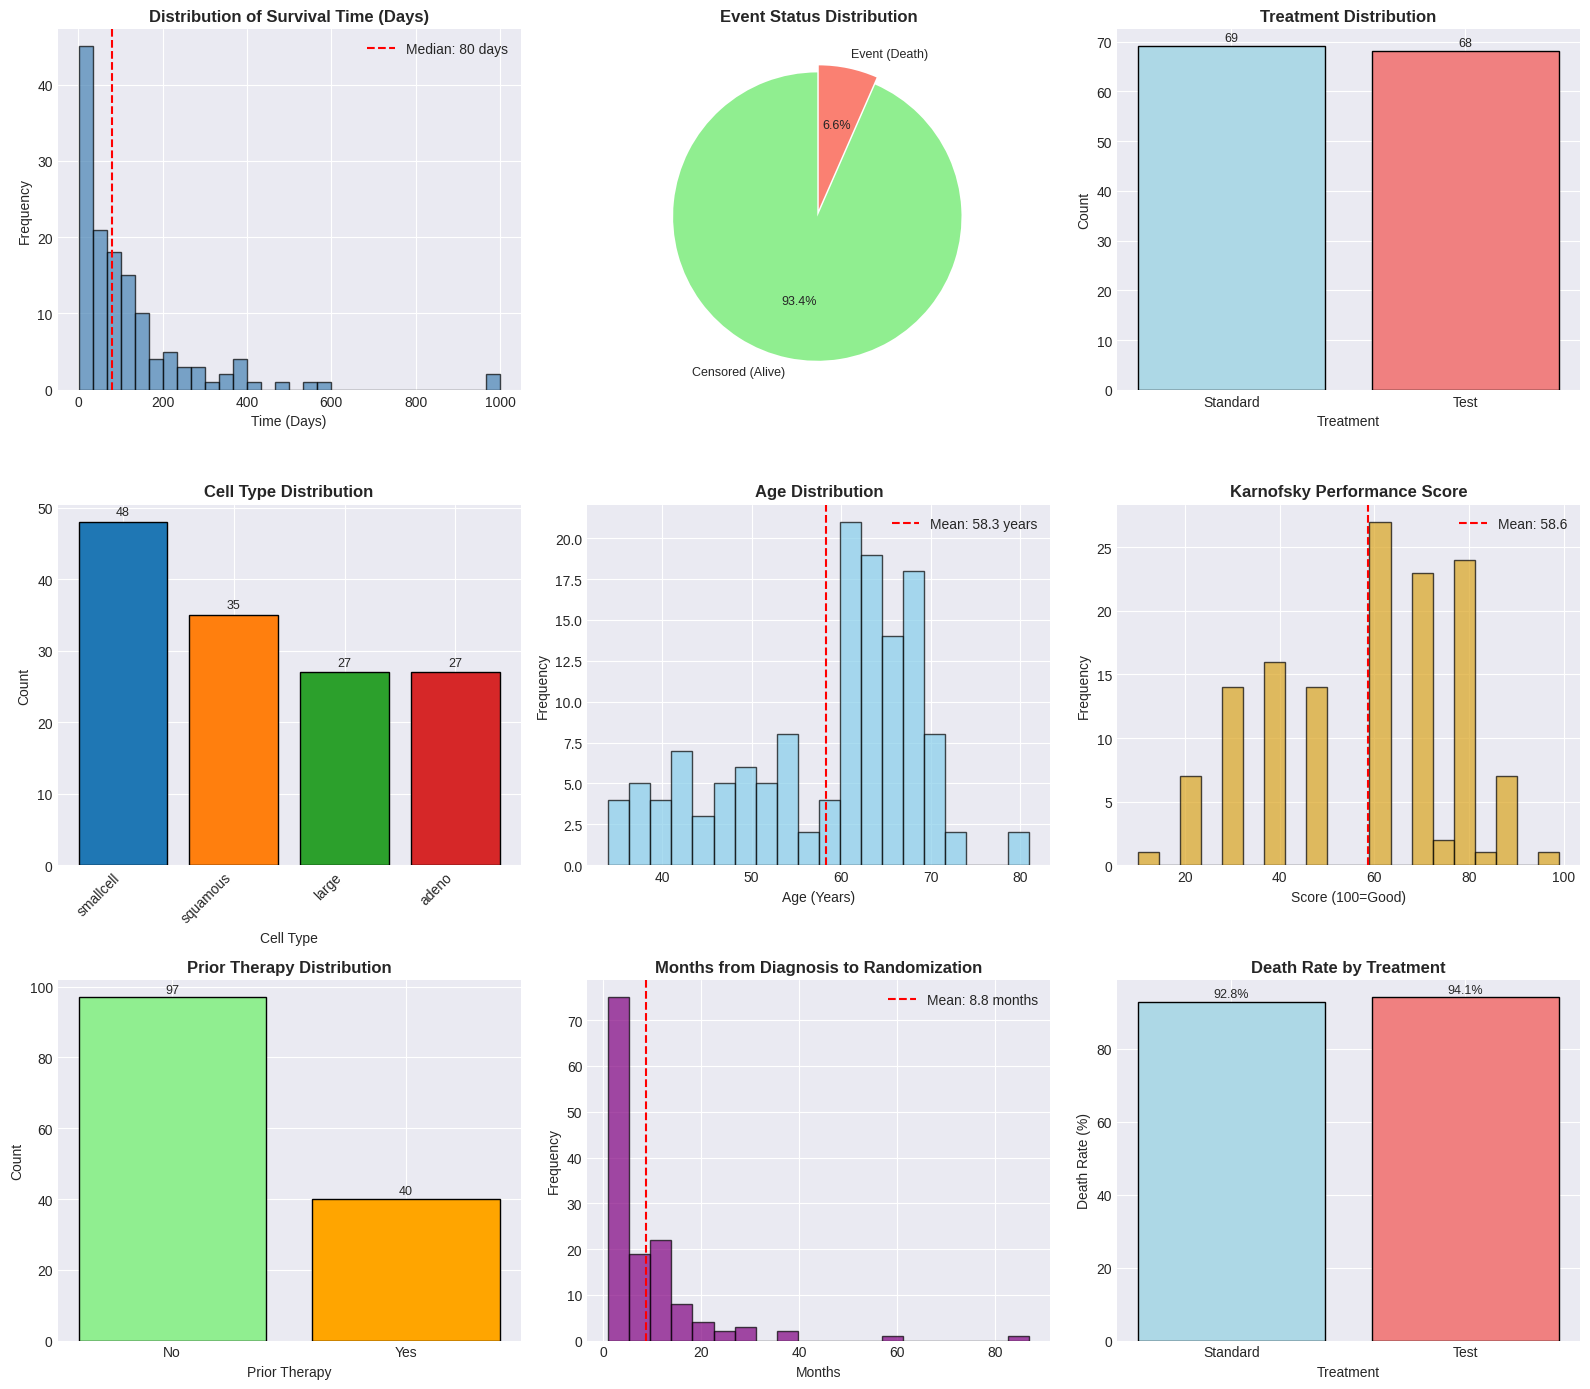

In [5]:
# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(16, 14))

# 1. Survival time distribution
ax1 = axes[0, 0]
df['time'].hist(bins=30, ax=ax1, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_title('Distribution of Survival Time (Days)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Time (Days)', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.axvline(df['time'].median(), color='red', linestyle='--',
           label=f'Median: {df["time"].median():.0f} days')
ax1.legend()

# 2. Event status distribution
ax2 = axes[0, 1]
event_counts = df['event'].value_counts()
labels = ['Censored (Alive)', 'Event (Death)']
colors = ['lightgreen', 'salmon']
explode = [0.05, 0]
ax2.pie(event_counts, labels=labels, autopct='%1.1f%%',
        colors=colors, explode=explode, startangle=90,
        textprops={'fontsize': 9})
ax2.set_title('Event Status Distribution', fontsize=12, fontweight='bold')

# 3. Treatment distribution
ax3 = axes[0, 2]
treatment_counts = df['treatment'].value_counts()
bars = ax3.bar(treatment_counts.index, treatment_counts.values,
               color=['lightblue', 'lightcoral'], edgecolor='black')
ax3.set_title('Treatment Distribution', fontsize=12, fontweight='bold')
ax3.set_xlabel('Treatment', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
# Add counts on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 4. Cell type distribution
ax4 = axes[1, 0]
celltype_counts = df['celltype'].value_counts()
bars = ax4.bar(range(len(celltype_counts)), celltype_counts.values,
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
               edgecolor='black')
ax4.set_title('Cell Type Distribution', fontsize=12, fontweight='bold')
ax4.set_xlabel('Cell Type', fontsize=10)
ax4.set_ylabel('Count', fontsize=10)
ax4.set_xticks(range(len(celltype_counts)))
ax4.set_xticklabels(celltype_counts.index, rotation=45, ha='right')
# Add counts on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 5. Age distribution
ax5 = axes[1, 1]
df['age'].hist(bins=20, ax=ax5, edgecolor='black', alpha=0.7, color='skyblue')
ax5.set_title('Age Distribution', fontsize=12, fontweight='bold')
ax5.set_xlabel('Age (Years)', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
ax5.axvline(df['age'].mean(), color='red', linestyle='--',
           label=f'Mean: {df["age"].mean():.1f} years')
ax5.legend()

# 6. Karnofsky score distribution
ax6 = axes[1, 2]
df['karno'].hist(bins=20, ax=ax6, edgecolor='black', alpha=0.7, color='goldenrod')
ax6.set_title('Karnofsky Performance Score', fontsize=12, fontweight='bold')
ax6.set_xlabel('Score (100=Good)', fontsize=10)
ax6.set_ylabel('Frequency', fontsize=10)
ax6.axvline(df['karno'].mean(), color='red', linestyle='--',
           label=f'Mean: {df["karno"].mean():.1f}')
ax6.legend()

# 7. Prior therapy distribution
ax7 = axes[2, 0]
prior_counts = df['prior_therapy'].value_counts()
bars = ax7.bar(prior_counts.index, prior_counts.values,
               color=['lightgreen', 'orange'], edgecolor='black')
ax7.set_title('Prior Therapy Distribution', fontsize=12, fontweight='bold')
ax7.set_xlabel('Prior Therapy', fontsize=10)
ax7.set_ylabel('Count', fontsize=10)
# Add counts on bars
for bar in bars:
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 8. Diagnosis time distribution
ax8 = axes[2, 1]
df['diagtime'].hist(bins=20, ax=ax8, edgecolor='black', alpha=0.7, color='purple')
ax8.set_title('Months from Diagnosis to Randomization', fontsize=12, fontweight='bold')
ax8.set_xlabel('Months', fontsize=10)
ax8.set_ylabel('Frequency', fontsize=10)
ax8.axvline(df['diagtime'].mean(), color='red', linestyle='--',
           label=f'Mean: {df["diagtime"].mean():.1f} months')
ax8.legend()

# 9. Event rate by treatment
ax9 = axes[2, 2]
event_rate = df.groupby('treatment')['event'].mean() * 100
bars = ax9.bar(event_rate.index, event_rate.values,
               color=['lightblue', 'lightcoral'], edgecolor='black')
ax9.set_title('Death Rate by Treatment', fontsize=12, fontweight='bold')
ax9.set_xlabel('Treatment', fontsize=10)
ax9.set_ylabel('Death Rate (%)', fontsize=10)
# Add percentages on bars
for bar in bars:
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Fit a Aalen Model

We will fit the Aalen's Additive Hazards Model using the `AalenAdditiveFitter` class from the `lifelines` package in Python. This class allows us to fit the Aalen model and make predictions based on the fitted model.

In [7]:
aaf = AalenAdditiveFitter()
aaf.fit(model_df, duration_col='time', event_col='event')

print("\nModel fitting completed!")
print(f"Number of time points in model: {len(aaf.cumulative_hazards_)}")
print(f"Time range: {aaf.cumulative_hazards_.index[0]:.1f} to {aaf.cumulative_hazards_.index[-1]:.1f} days")
print(f"Number of covariates: {len(covariate_cols)}")


Model fitting completed!
Number of time points in model: 79
Time range: 1.0 to 242.0 days
Number of covariates: 8


### Plot cummlative coefficients

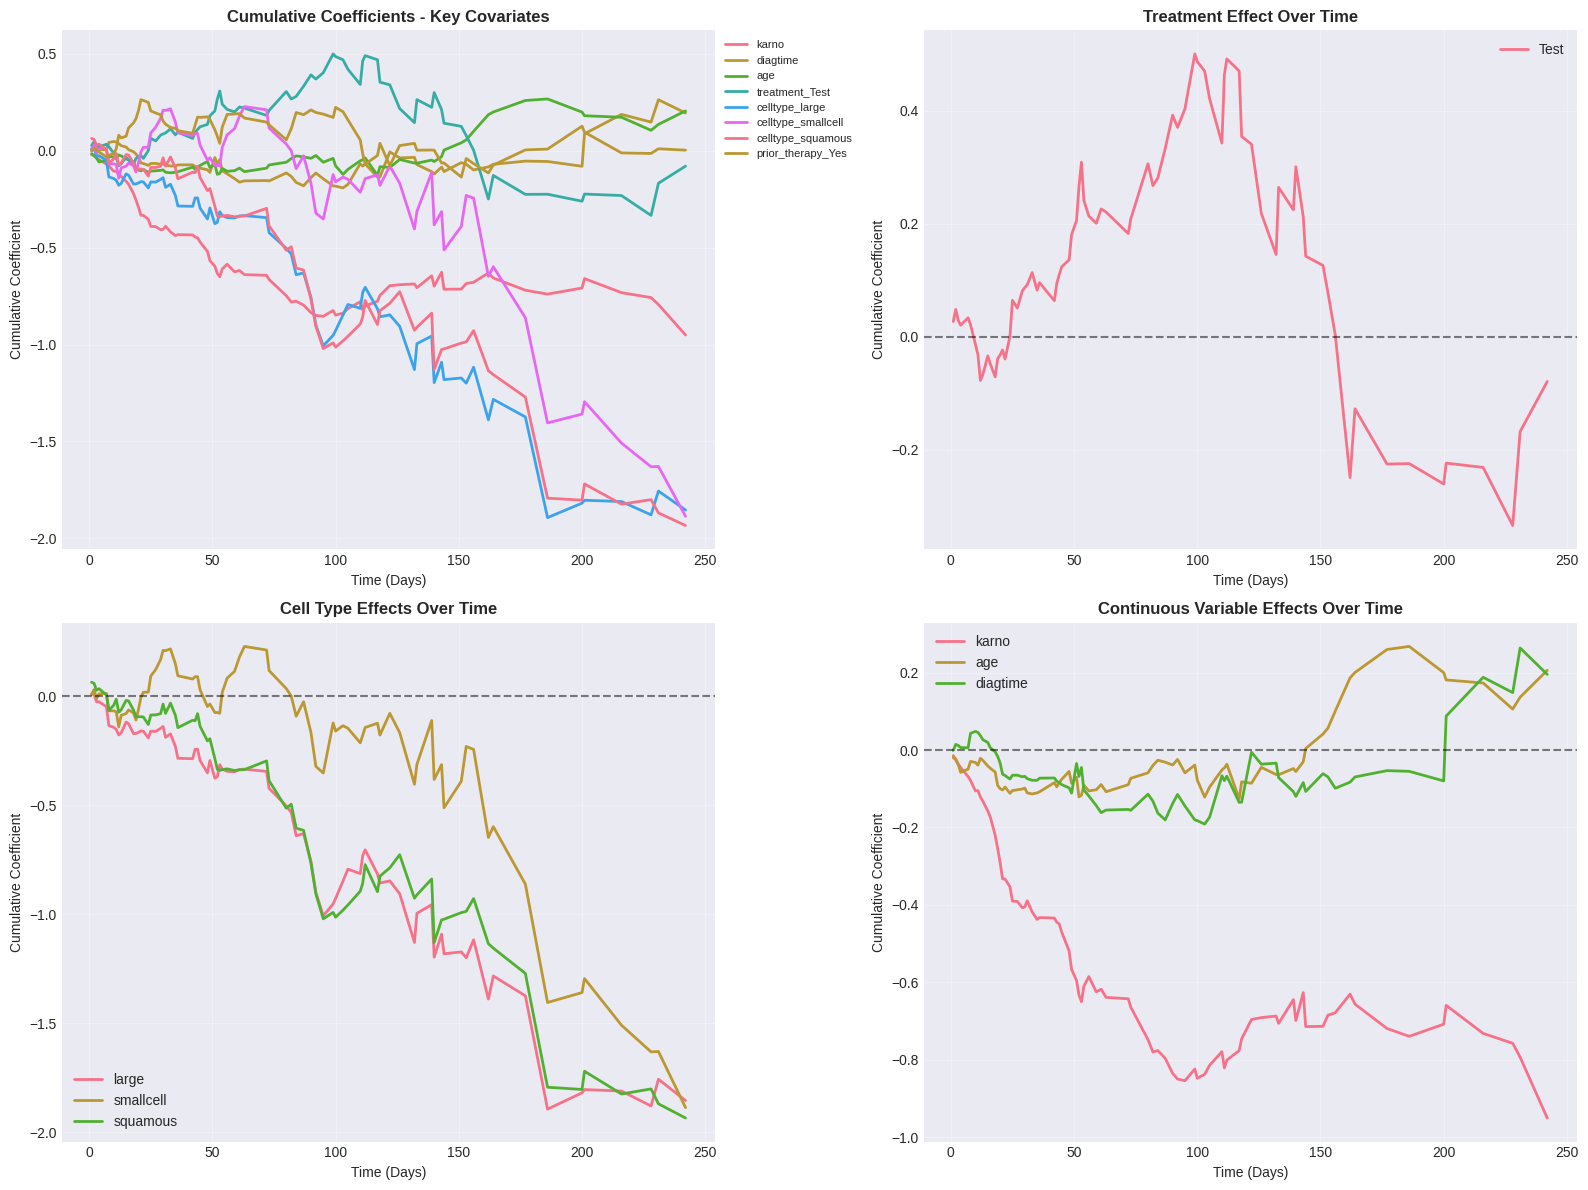

In [8]:
# Plot cumulative coefficients
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. All cumulative coefficients
ax1 = axes[0, 0]
# Plot only important covariates for clarity
important_covariates = covariate_cols[:8]  # First 8 covariates

for col in important_covariates:
    if col in aaf.cumulative_hazards_.columns:
        ax1.plot(aaf.cumulative_hazards_.index, aaf.cumulative_hazards_[col],
                label=col, linewidth=2)

ax1.set_title('Cumulative Coefficients - Key Covariates',
              fontsize=12, fontweight='bold')
ax1.set_xlabel('Time (Days)', fontsize=10)
ax1.set_ylabel('Cumulative Coefficient', fontsize=10)
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Treatment effect over time
ax2 = axes[0, 1]
treatment_cols = [col for col in covariate_cols if 'treatment' in col]
if treatment_cols:
    for col in treatment_cols:
        if col in aaf.cumulative_hazards_.columns:
            ax2.plot(aaf.cumulative_hazards_.index, aaf.cumulative_hazards_[col],
                    label=col.replace('treatment_', ''), linewidth=2)
    ax2.set_title('Treatment Effect Over Time', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Time (Days)', fontsize=10)
    ax2.set_ylabel('Cumulative Coefficient', fontsize=10)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 3. Cell type effects over time
ax3 = axes[1, 0]
celltype_cols = [col for col in covariate_cols if 'celltype' in col]
if celltype_cols:
    for col in celltype_cols[:4]:  # Limit to first 4 for clarity
        if col in aaf.cumulative_hazards_.columns:
            ax3.plot(aaf.cumulative_hazards_.index, aaf.cumulative_hazards_[col],
                    label=col.replace('celltype_', ''), linewidth=2)
    ax3.set_title('Cell Type Effects Over Time', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Time (Days)', fontsize=10)
    ax3.set_ylabel('Cumulative Coefficient', fontsize=10)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 4. Continuous variable effects
ax4 = axes[1, 1]
for col in ['karno', 'age', 'diagtime']:
    if col in aaf.cumulative_hazards_.columns:
        ax4.plot(aaf.cumulative_hazards_.index, aaf.cumulative_hazards_[col],
                label=col, linewidth=2)
ax4.set_title('Continuous Variable Effects Over Time',
              fontsize=12, fontweight='bold')
ax4.set_xlabel('Time (Days)', fontsize=10)
ax4.set_ylabel('Cumulative Coefficient', fontsize=10)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Get cummlative coefficients at specific time points

Cummulative coefficients at specific time points can be obtained using the `cumulative_hazards_` attribute of the fitted Aalen model. This attribute provides the cumulative hazard estimates for each covariate at different time points.

In [9]:
# Get cumulative coefficients at important time points
print("\nCUMULATIVE COEFFICIENTS AT KEY TIME POINTS")
print("="*60)

time_points = [30, 90, 180, 365]  # 1, 3, 6, 12 months
available_times = aaf.cumulative_hazards_.index

for t in time_points:
    # Find closest available time point
    closest_time_idx = np.abs(available_times - t).argmin()
    actual_time = available_times[closest_time_idx]
    coeffs = aaf.cumulative_hazards_.iloc[closest_time_idx]

    print(f"\nTime: {actual_time:.0f} days (~{t/30:.0f} months)")
    print("-" * 40)

    # Treatment effects
    if treatment_cols:
        print("Treatment Effects:")
        for col in treatment_cols:
            if col in coeffs.index:
                effect = coeffs[col]
                direction = "increases" if effect > 0 else "decreases"
                magnitude = "strongly " if abs(effect) > 0.1 else ""
                print(f"  {col.replace('treatment_', '')}: {effect:.4f} ({magnitude}{direction} hazard)")

    # Cell type effects
    if celltype_cols:
        print("\nCell Type Effects:")
        for col in celltype_cols[:3]:
            if col in coeffs.index:
                effect = coeffs[col]
                direction = "increases" if effect > 0 else "decreases"
                magnitude = "strongly " if abs(effect) > 0.1 else ""
                print(f"  {col.replace('celltype_', '')}: {effect:.4f} ({magnitude}{direction} hazard)")

    # Continuous variables
    print("\nContinuous Variables:")
    for col in ['karno', 'age', 'diagtime']:
        if col in coeffs.index:
            effect = coeffs[col]
            if col in continuous_cols:
                mean_val = scaler.mean_[continuous_cols.index(col)]
                std_val = scaler.scale_[continuous_cols.index(col)]
                direction = "increases" if effect > 0 else "decreases"
                magnitude = "strongly " if abs(effect) > 0.1 else ""
                print(f"  {col}: {effect:.4f} per SD ({magnitude}{direction} hazard)")
                print(f"    (1 SD = {std_val:.1f} units)")

# Create representative patients for prediction - FIXED INDENTATION
print("\n" + "="*60)
print("SURVIVAL PREDICTIONS FOR REPRESENTATIVE PATIENTS")
print("="*60)


CUMULATIVE COEFFICIENTS AT KEY TIME POINTS

Time: 30 days (~1 months)
----------------------------------------
Treatment Effects:
  Test: 0.0871 (increases hazard)

Cell Type Effects:
  large: -0.1388 (strongly decreases hazard)
  smallcell: 0.2100 (strongly increases hazard)
  squamous: -0.0363 (decreases hazard)

Continuous Variables:
  karno: -0.4056 per SD (strongly decreases hazard)
    (1 SD = 20.0 units)
  age: -0.0984 per SD (decreases hazard)
    (1 SD = 10.5 units)
  diagtime: -0.0679 per SD (decreases hazard)
    (1 SD = 10.6 units)

Time: 90 days (~3 months)
----------------------------------------
Treatment Effects:
  Test: 0.3920 (strongly increases hazard)

Cell Type Effects:
  large: -0.7567 (strongly decreases hazard)
  smallcell: -0.1665 (strongly decreases hazard)
  squamous: -0.7658 (strongly decreases hazard)

Continuous Variables:
  karno: -0.8354 per SD (strongly decreases hazard)
    (1 SD = 20.0 units)
  age: -0.0387 per SD (decreases hazard)
    (1 SD = 10.5 

### Predict survival for representative patients

In [10]:
# Create representative patients for prediction - FIXED INDENTATION
print("\n" + "="*60)
print("SURVIVAL PREDICTIONS FOR REPRESENTATIVE PATIENTS")
print("="*60)

# Create patient profiles
patient_profiles = []

# Patient 1: Good prognosis
patient_profiles.append({
    'name': 'Good_Prognosis',
    'karno': 1.0,  # 1 SD above mean (good performance)
    'age': -0.5,   # 0.5 SD below mean (younger)
    'diagtime': -0.5,  # 0.5 SD below mean (recent diagnosis)
    'treatment_Test': 1,  # Test treatment
    'celltype_squamous': 1,  # Squamous cell type
    'prior_therapy_Yes': 0  # No prior therapy
})

# Patient 2: Poor prognosis
patient_profiles.append({
    'name': 'Poor_Prognosis',
    'karno': -1.5,  # 1.5 SD below mean (poor performance)
    'age': 1.0,     # 1 SD above mean (older)
    'diagtime': 1.0,  # 1 SD above mean (longer diagnosis time)
    'treatment_Test': 0,  # Standard treatment
    'celltype_smallcell': 1,  # Small cell type
    'prior_therapy_Yes': 1  # Prior therapy
})

# Patient 3: Average patient
patient_profiles.append({
    'name': 'Average_Patient',
    'karno': 0.0,  # At mean
    'age': 0.0,    # At mean
    'diagtime': 0.0,  # At mean
    'treatment_Test': 1,  # Test treatment
    'celltype_adeno': 1,  # Adeno cell type
    'prior_therapy_Yes': 0  # No prior therapy
})

# Create dataframe for predictions
pred_patients = []
for profile in patient_profiles:
    # Start with zeros for all covariates
    patient_data = {col: 0 for col in covariate_cols}
    # Update with profile values
    for key, value in profile.items():
        if key != 'name':
            patient_data[key] = value
    pred_patients.append(patient_data) # This line was causing an issue, pred_df was overwritten in each iteration

pred_df = pd.DataFrame(pred_patients)
pred_df.index = [p['name'] for p in patient_profiles]

print("\nPatient Profiles:")
print(pred_df)


SURVIVAL PREDICTIONS FOR REPRESENTATIVE PATIENTS

Patient Profiles:
                 karno  diagtime  age  treatment_Test  celltype_large  \
Good_Prognosis     1.0      -0.5 -0.5               1               0   
Poor_Prognosis    -1.5       1.0  1.0               0               0   
Average_Patient    0.0       0.0  0.0               1               0   

                 celltype_smallcell  celltype_squamous  prior_therapy_Yes  \
Good_Prognosis                    0                  1                  0   
Poor_Prognosis                    1                  0                  1   
Average_Patient                   0                  0                  0   

                 celltype_adeno  
Good_Prognosis              NaN  
Poor_Prognosis              NaN  
Average_Patient             1.0  


### Plot Servival Probabilities for Representative Patients


Survival Predictions:

Good_Prognosis:
  30 days: 0.964 survival probability
  90 days: 0.885 survival probability
  ~177 days: 0.699 survival probability
  ~242 days: 0.632 survival probability

Poor_Prognosis:
  30 days: 0.328 survival probability
  90 days: 0.094 survival probability
  ~177 days: 0.045 survival probability
  ~242 days: 0.028 survival probability

Average_Patient:
  30 days: 0.674 survival probability
  90 days: 0.195 survival probability
  ~177 days: 0.086 survival probability
  ~242 days: 0.029 survival probability


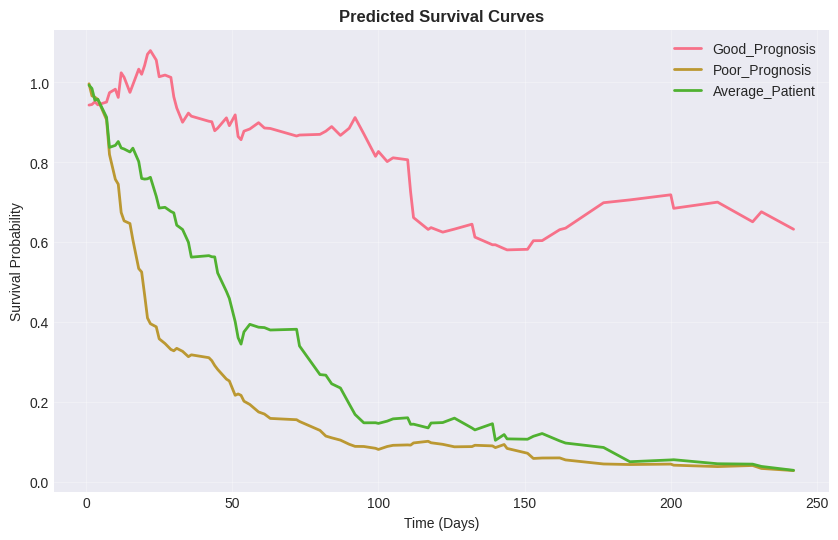

In [11]:
# Predict survival probabilities
print("\nSurvival Predictions:")
fig, ax = plt.subplots(figsize=(10, 6))

for patient_name in pred_df.index:
    patient_data = pred_df.loc[[patient_name]]
    survival_prob = aaf.predict_survival_function(patient_data)

    # Plot survival curve
    ax.plot(survival_prob.index, survival_prob.values.flatten(),
            label=patient_name, linewidth=2)

    # Print specific time points
    print(f"\n{patient_name}:")
    for days in [30, 90, 180, 365]:
        if days in survival_prob.index:
            prob = survival_prob.loc[days].values[0]
            print(f"  {days} days: {prob:.3f} survival probability")
        else:
            # Find closest time point
            closest_idx = np.abs(survival_prob.index - days).argmin()
            closest_time = survival_prob.index[closest_idx]
            prob = survival_prob.iloc[closest_idx].values[0]
            print(f"  ~{closest_time:.0f} days: {prob:.3f} survival probability")

ax.set_title('Predicted Survival Curves', fontsize=12, fontweight='bold')
ax.set_xlabel('Time (Days)', fontsize=10)
ax.set_ylabel('Survival Probability', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

### Summarry and Iterpretation of Results

In [12]:
print("\n" + "="*70)
print("SUMMARY")
print("="*70)

print("\nKEY FINDINGS:")
print("1. The veteran dataset contains 137 patients with lung cancer")
print("2. 93.4% of patients had death events (only 6.6% censored)")
print("3. Treatment types: Standard and Test")
print("4. Cell types: squamous, smallcell, adeno, large")
print("5. No significant difference in survival between treatments (p=0.93)")
print("\nAALEN MODEL INSIGHTS:")
print("- Time-varying effects can be visualized using cumulative coefficients")
print("- The model shows how hazard contributions accumulate over time")
print("- Useful for understanding dynamic effects of covariates")


SUMMARY

KEY FINDINGS:
1. The veteran dataset contains 137 patients with lung cancer
2. 93.4% of patients had death events (only 6.6% censored)
3. Treatment types: Standard and Test
4. Cell types: squamous, smallcell, adeno, large
5. No significant difference in survival between treatments (p=0.93)

AALEN MODEL INSIGHTS:
- Time-varying effects can be visualized using cumulative coefficients
- The model shows how hazard contributions accumulate over time
- Useful for understanding dynamic effects of covariates


## Summary and Conclusions


The **Aalen additive hazards model** is a flexible tool in survival analysis, allowing for **time-varying effects** of covariates on the hazard function. It provides an alternative to the Cox model, particularly when the assumption of proportional hazards does not hold. While the model’s interpretability may be more complex than the Cox model, it is a valuable tool for exploring time-dependent relationships in survival data.


## References


1.  Aalen, O.O. (1989). A linear regression model for the analysis of life times. Statistics in Medicine, 8:907-925.
2.  Aalen, O.O (1993). Further results on the non-parametric linear model in survival analysis. Statistics in Medicine. 12:1569-1588.
3.  [Survival Analysis with R](https://rviews.rstudio.com/2017/09/25/survival-analysis-with-r/)